In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
g = tf.Graph()

In [3]:
import tensorflow as tf

## 그래프를 생성합니다
g = tf.Graph()
with g.as_default():
    x = tf.compat.v1.placeholder(dtype=tf.float32,
                       shape=(None), name='x')
    w = tf.Variable(2.0, name='weight')
    b = tf.Variable(0.7, name='bias')

    z = w*x + b
    init = tf.compat.v1.global_variables_initializer()

## 세션을 만들고 그래프 g를 전달합니다
with tf.compat.v1.Session(graph=g) as sess:
    ## w와 b를 초기화합니다.
    sess.run(init)
    ## z를 평가합니다.
    for t in [1.0, 0.6, -1.8]:
        print('x=%4.1f --> z=%4.1f'%(
              t, sess.run(z, feed_dict={x:t})))

W1030 23:33:34.379751  4260 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


x= 1.0 --> z= 2.7
x= 0.6 --> z= 1.9
x=-1.8 --> z=-2.9


In [8]:
import tensorflow as tf

In [9]:
with tf.compat.v1.Session(graph = g) as sess:
    sess.run(init)
    print(sess.run(z, feed_dict = {x:[1.,2.,3.]}))

[2.7 4.7 6.7]


In [10]:
print(z)

Tensor("add:0", dtype=float32)


In [4]:
w = tf.Variable(2.0, name='w')
b = tf.Variable(0.7, name='b')

for x in [1.0, 0.6, -1.8]:
    z = w * x + b
    print('x=%4.1f --> z=%4.1f' %(x,z))

x= 1.0 --> z= 2.7
x= 0.6 --> z= 1.9
x=-1.8 --> z=-2.9


In [7]:
z = w * [1.,2.,3.] + b

print(z.numpy())

[2.7 4.7 6.7]


In [8]:
import numpy as np

In [10]:
x_array = np.arange(18).reshape(3,2,3)
x2 = tf.reshape(x_array, shape = (-1, 6) )
xsum = tf.reduce_sum(x2, axis=0)
xmean = tf.reduce_mean(x2, axis = 0)

In [12]:
print('입력크기', x_array.shape)
print('크기가 변경된 입력\n', x2.numpy())
print('열의 합', xsum.numpy())
print('열의 평균', xmean.numpy())

입력크기 (3, 2, 3)
크기가 변경된 입력
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]]
열의 합 [18 21 24 27 30 33]
열의 평균 [ 6  7  8  9 10 11]


In [13]:
X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1,
                    2.0, 5.0, 6.3, 
                    6.6, 7.4, 8.0, 
                    9.0])

In [22]:
class TfLinreg(object):
    def __init__(self, learning_rate=0.01):
        self.w = tf.Variable(tf.zeros(shape=(1)))
        self.b = tf.Variable(tf.zeros(shape=(1)))
        self.optimizer = tf.keras.optimizers.SGD(lr=learning_rate)
        
    def fit(self, X, y, num_epoches = 10):
        training_costs = []
        for step in range(num_epoches):
            with tf.GradientTape() as tape:
                z_net = self.w * X + self.b
                z_net = tf.reshape(z_net, [-1])
                sqr_errors = tf.square( y - z_net)
                mean_cost = tf.reduce_mean(sqr_errors)
            grads = tape.gradient(mean_cost, [self.w, self.b])
            self.optimizer.apply_gradients(zip(grads, [self.w, self.b]))
            training_costs.append(mean_cost.numpy())
        return training_costs
    def predict(self, X):
        return self.w * X + self.b

In [23]:
lrmodel = TfLinreg()

In [24]:
training_cost = lrmodel.fit(X_train, y_train)

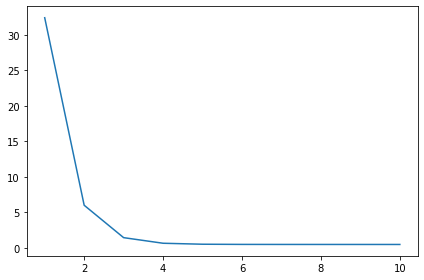

In [25]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(training_cost)+1), training_cost)
plt.tight_layout()
plt.show()

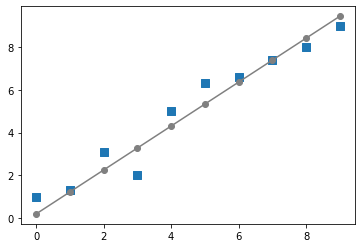

In [28]:
plt.scatter(X_train, y_train, marker='s' , s= 50 )
plt.plot(range(X_train.shape[0]), lrmodel.predict(X_train),color='gray',marker='o')
plt.show()

In [57]:
# MNIST 데이터셋 압축 해제

import sys
import gzip
import shutil
import os

if (sys.version_info > (3, 0)):
    writemode = 'wb'
else:
    writemode = 'w'

zipped_mnist = ['data/'+f for f in os.listdir('data/') if f.endswith('ubyte.gz')]
for z in zipped_mnist:
    with gzip.GzipFile(z, mode='rb') as decompressed, open(z[:-3], writemode) as outfile:
        outfile.write(decompressed.read())

In [58]:
import os
import struct
import numpy as np
 
def load_mnist(path, kind='train'):
    """`path`에서 MNIST 데이터 불러오기"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte' % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', 
                                 lbpath.read(8))
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                             dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2
 
    return images, labels   

In [54]:
X_train, y_train = load_mnist('data/', kind='train')
print('행: %d,  열: %d' %(X_train.shape[0], 
                                 X_train.shape[1]))
X_test, y_test = load_mnist('data/', kind='t10k')
print('행: %d,  열: %d' %(X_test.shape[0], 
                                 X_test.shape[1]))

## 평균을 0으로 만들고 표준 편차로 나눕니다.
mean_vals = np.mean(X_train, axis=0)
std_val = np.std(X_train)

X_train_centered = (X_train - mean_vals)/std_val
X_test_centered = (X_test - mean_vals)/std_val
 
del X_train, X_test
 
print(X_train_centered.shape, y_train.shape)

print(X_test_centered.shape, y_test.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'data/train-labels-idx1-ubyte'

In [36]:
np.random.seed(123)

In [37]:
y_train_onehot= tf.keras.utils.to_categorical(y_train)

In [39]:
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Dense(
        units=50,
        input_dim = X_train_centered.shape[1],
        kernel_initializer = 'glorot_uniform',
        bias_initializer = 'zeros',
        activation = 'tanh'))
model.add(
    tf.keras.layers.Dense(
        units=50,
        input_dim = 50,
        kernel_initializer = 'glorot_uniform',
        bias_initializer = 'zeros',
        activation = 'tanh'))
model.add(
    tf.keras.layers.Dense(
        units=y_train_onehot.shape[1],
        kernel_initializer = 'glorot_uniform',
        bias_initializer = 'zeros',
        activation = 'softmax'))


In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [41]:
 sgd_optimizer = tf.keras.optimizers.SGD(
    lr=0.001, decay=1e-7, momentum=.9)

model.compile(optimizer=sgd_optimizer,
              loss='categorical_crossentropy')

In [42]:
history = model.fit(X_train_centered, y_train_onehot,
                    batch_size=64, epochs=50,
                    verbose=1,
                    validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 4s 72us/sample - loss: 0.7448 - val_loss: 0.3634
Epoch 2/50
54000/54000 [==============================] - 3s 50us/sample - loss: 0.3670 - val_loss: 0.2716
Epoch 3/50
54000/54000 [==============================] - 3s 49us/sample - loss: 0.2997 - val_loss: 0.2333
Epoch 4/50
54000/54000 [==============================] - 3s 49us/sample - loss: 0.2640 - val_loss: 0.2107
Epoch 5/50
54000/54000 [==============================] - 3s 50us/sample - loss: 0.2395 - val_loss: 0.1937
Epoch 6/50
54000/54000 [==============================] - 3s 53us/sample - loss: 0.2206 - val_loss: 0.1820
Epoch 7/50
54000/54000 [==============================] - 3s 62us/sample - loss: 0.2054 - val_loss: 0.1713
Epoch 8/50
54000/54000 [==============================] - 3s 63us/sample - loss: 0.1924 - val_loss: 0.1633
Epoch 9/50
54000/54000 [==============================] - 3s 59us/sample - loss: 0.1809 - val_l

In [43]:
y_train_pred = model.predict_classes(X_train_centered, 
                                     verbose=0)
correct_preds = np.sum(y_train == y_train_pred, axis=0) 
train_acc = correct_preds / y_train.shape[0]

print('처음 3개 예측: ', y_train_pred[:3])
print('훈련 정확도: %.2f%%' % (train_acc * 100))

처음 3개 예측:  [5 0 4]
훈련 정확도: 99.02%


In [44]:
y_test_pred = model.predict_classes(X_test_centered, 
                                    verbose=0)

correct_preds = np.sum(y_test == y_test_pred, axis=0) 
test_acc = correct_preds / y_test.shape[0]
print('테스트 정확도: %.2f%%' % (test_acc * 100))

테스트 정확도: 96.06%
